In [1]:
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
from func import *

1. json 파일에서 bbox별로 score, 크기 가져오기

In [2]:
import json

# JSON 파일 경로
json_file_path = 'bbox_result.json'

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    bbox_data = json.load(f)

print(f'개수: {len(bbox_data)}')

JSONDecodeError: Extra data: line 8890277 column 2 (char 288687888)

In [7]:
# 필요한 키만 추출하여 데이터프레임으로 변환
df = pd.DataFrame([
    {
        "image_file": entry["image_file"],
        "rotation": entry["rotation"],
        "bbox": entry["bbox"],
        "bbox_score": entry["bbox_score"],
        # "dataset": entry["dataset"],
        "bbox_id": entry["bbox_id"]
    }
    for entry in bbox_data
])

# 데이터프레임 출력
print(df)

                                image_file  rotation  \
0       data/coco/val2017/000000532481.jpg         0   
1       data/coco/val2017/000000532481.jpg         0   
2       data/coco/val2017/000000532481.jpg         0   
3       data/coco/val2017/000000532481.jpg         0   
4       data/coco/val2017/000000532481.jpg         0   
...                                    ...       ...   
104120  data/coco/val2017/000000179112.jpg         0   
104121  data/coco/val2017/000000179112.jpg         0   
104122  data/coco/val2017/000000179112.jpg         0   
104123  data/coco/val2017/000000311295.jpg         0   
104124  data/coco/val2017/000000311295.jpg         0   

                                                     bbox  bbox_score  bbox_id  
0       [249.8199079291458, 175.21093805640606, 74.004...    0.999274        0  
1       [284.07836701140275, 370.43747059580454, 13.84...    0.983319        1  
2       [244.05099093550018, 170.61324112294565, 74.56...    0.471152        2  
3  

shape (426, 640)


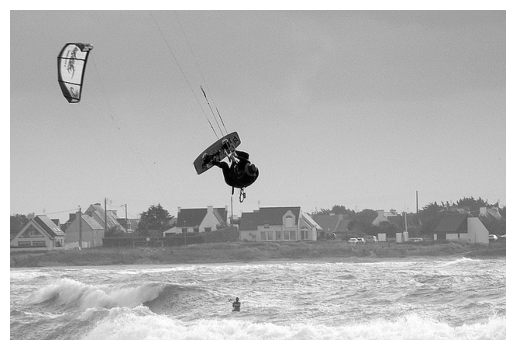

In [8]:
# 이미지 읽기
image = cv2.imread('val2017/000000532481.jpg', cv2.IMREAD_GRAYSCALE)
print("shape", image.shape)
plt.axis(False)
plt.imshow(image, cmap="gray")

In [9]:
def find_entries_by_image_id(entries, target_image_id):
    result_entries = [entry for entry in entries if entry['image_id'] == target_image_id]
    return result_entries

# 특정 image_id에 해당하는 항목 찾기
target_image_id = 532481 
result_entries = find_entries_by_image_id(bbox_data, target_image_id)

# 결과 출력
print(result_entries)

[{'bbox': [249.8199079291458, 175.21093805640606, 74.00419360691592, 55.626325589288854], 'category_id': 1, 'image_id': 532481, 'score': 0.9992738366127014}, {'bbox': [284.07836701140275, 370.43747059580454, 13.844297577440784, 17.42933096343188], 'category_id': 1, 'image_id': 532481, 'score': 0.983318567276001}, {'bbox': [244.05099093550018, 170.61324112294565, 74.56380466590753, 73.94038239037835], 'category_id': 1, 'image_id': 532481, 'score': 0.47115205022441037}, {'bbox': [285.7852415208732, 370.21400193144893, 10.915034263919551, 14.482651193668573], 'category_id': 1, 'image_id': 532481, 'score': 0.4278663615090903}, {'bbox': [254.66838783379924, 177.22587387050734, 65.52905271988865, 58.952817443165856], 'category_id': 1, 'image_id': 532481, 'score': 0.212189368775293}, {'bbox': [281.9238989669847, 372.8193001415256, 5.381248866529177, 5.172031923588349], 'category_id': 1, 'image_id': 532481, 'score': 0.2032529043531232}, {'bbox': [284.9343014880985, 370.3538856110978, 11.935201

In [5]:
# JSON 파일 경로
json_file_path = 'result_keypoints_small_base.json'

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    keypoints_data = json.load(f)

print(f'개수: {len(keypoints_data)}')

개수: 73304


In [7]:
keypoints_data

[{'category_id': 1,
  'center': [286.8219909667969, 203.0240936279297],
  'image_id': 532481,
  'keypoints': [304.10455322265625,
   205.63363647460938,
   0.635560154914856,
   305.57257080078125,
   208.02825927734375,
   0.6628440022468567,
   305.887451171875,
   203.97055053710938,
   0.7066944241523743,
   308.292236328125,
   212.33123779296875,
   0.7076610326766968,
   307.8108215332031,
   200.96145629882812,
   0.7889577150344849,
   304.9803771972656,
   221.23358154296875,
   0.542646586894989,
   307.029296875,
   199.43212890625,
   0.6166626811027527,
   286.4277038574219,
   216.994384765625,
   0.5636980533599854,
   304.35333251953125,
   189.78921508789062,
   0.766808032989502,
   288.661865234375,
   196.2508544921875,
   0.8172591924667358,
   289.50799560546875,
   185.71563720703125,
   0.7548297047615051,
   286.94873046875,
   220.6424560546875,
   0.6982241272926331,
   289.841064453125,
   207.94869995117188,
   0.43217897415161133,
   276.4979248046875,
  